In [1]:
import sklearn
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
import lib.compressions as compressions
import lib.logistic_regression as logit
import lib.load_datasets as load_datasets

In [2]:
X, y = load_datasets.dataset_to_X_y('framingham.csv', nrows=100)
#X, y = make_blobs(n_samples=700, centers=2, n_features=10, random_state=0)

In [4]:
N, dim = X.shape
d = dim + 1
Xones = (np.insert(X.T, 0, np.ones(N)).reshape(dim+1, N)).T
theta0 = np.zeros(dim + 1)

experiments = [
    compressions.compressedGD(logit.gradf, theta0, Xones, y, name='Without'),
    #compressions.compressedGD(logit.gradf, theta0, Xones, y, compression=compressions.topK, k=d//3, name='Top-k, k=d/3'),
    #compressions.compressedGD(logit.gradf, theta0, Xones, y, compression=compressions.topK, k=1, name='Top-k, k=1'),
    #compressions.compressedGD(logit.gradf, theta0, Xones, y, compression=compressions.uniformCompression, name='Rand-k, k=d/2'),
    #compressions.compressedGD(logit.gradf, theta0, Xones, y, compression=compressions.uniformCompression, k=1, name=r'Rand-k, k=1'),
    #compressions.stochasticCompressedGD(logit.gradf, theta0, Xones, y, compression=compressions.stochasticCompression, name='Stochastic, k=d/2'),
]

start Without
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
end Without


In [5]:
experiments.sort(key=lambda exp : exp['k'] * exp['num_iter'])

table = [
    ["compression", "num_iter", "transmitted coordinates"],
    *[
        [exp['name'], exp['num_iter'], exp['k'] * exp['num_iter']]
        for exp in experiments
    ]
]
print(tabulate(table))

-----------  --------  -----------------------
compression  num_iter  transmitted coordinates
Without      1000000   16000000
-----------  --------  -----------------------


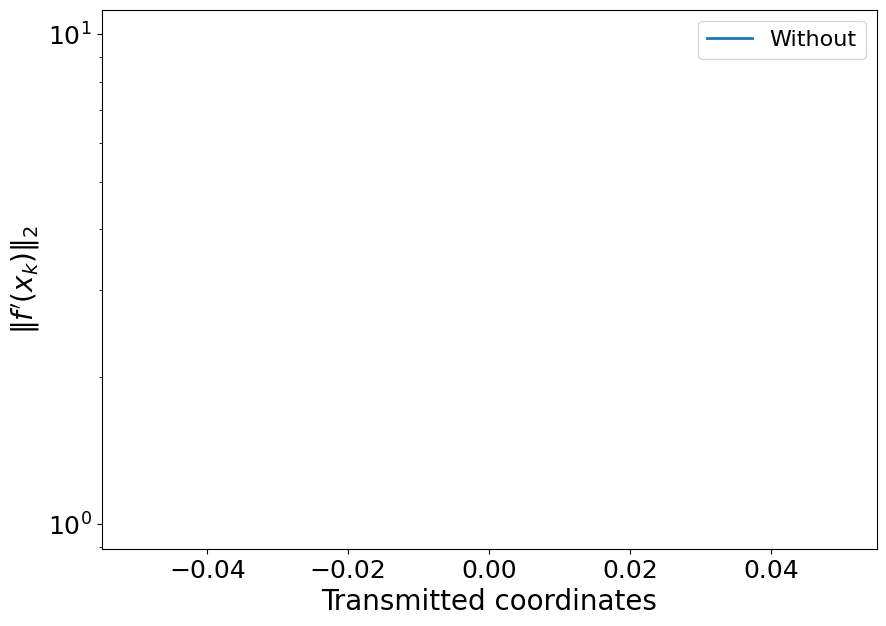

In [6]:
plt.figure(figsize=(10, 7))
for exp in experiments:
    plt.semilogy(
        exp['coords'],
        [grad_norm for grad_norm in exp['gradients']],
        label=exp['name'],
        linewidth=2
    )
plt.legend(loc="best", fontsize=16)
plt.xlabel(r"Transmitted coordinates", fontsize=20)
plt.ylabel(r"$\|f'(x_k)\|_2$", fontsize=20)
plt.xticks(fontsize=18)
_ = plt.yticks(fontsize=18)